In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import arviz as az

In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

In [3]:
def positive_predictive_value_of_diagnostic_test(sens, spec, prev):
    return (sens * prev) / (sens * prev + (1 - spec) * (1 - prev))


def negative_predictive_value_of_diagnostic_test(sens, spec, prev):
    return (spec * (1 - prev)) / (spec * (1 - prev) + (1 - sens) * prev)

In [4]:
sens = 0.9  # sensibilità
spec = 0.9  # specificità
prev = 0.01  # prevalenza

In [5]:
res_pos = positive_predictive_value_of_diagnostic_test(sens, spec, prev)
print(f"P(M+ | T+) = {round(res_pos, 3)}")

P(M+ | T+) = 0.083


In [6]:
res_neg = negative_predictive_value_of_diagnostic_test(sens, spec, prev)
print(f"P(M- | T-) = {round(res_neg, 3)}")

P(M- | T-) = 0.999


In [7]:
 prev = 138599 / 59000000
 prev

0.002349135593220339

In [8]:
sens = (0.7 + 0.86) / 2  # sensibilità
spec = (0.95 + 0.97) / 2 # specificità

res_pos = positive_predictive_value_of_diagnostic_test(sens, spec, prev)
print(f"P(M+ | T+) = {round(res_pos, 3)}")

P(M+ | T+) = 0.044


In [9]:
prev = 138599 / 59000000 * 100

res_pos = positive_predictive_value_of_diagnostic_test(sens, spec, prev)
print(f"P(M+ | T+) = {round(res_pos, 3)}")

P(M+ | T+) = 0.857


In [10]:
sens = (0.7 + 0.86) / 2  # sensibilità
spec = (0.95 + 0.97) / 2  # specificità
prev = 138599 / 59000000  # prevalenza

res_neg = negative_predictive_value_of_diagnostic_test(sens, spec, prev)
print(f"P(M- | T-) = {round(res_neg, 3)}")

P(M- | T-) = 0.999


In [11]:
df = pd.read_csv('../data/penguins.csv')

df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 23.4+ KB


In [12]:
def prob(A):
    """Computes the probability of a proposition, A.""" 
    return A.mean()

In [13]:
def conditional(proposition, given): 
    return prob(proposition[given])

In [14]:
female = df["sex"] == "female"
small = df["body_mass_g"] < df["body_mass_g"].quantile(1/3)

In [15]:
prob(female & small) == prob(small & female)

True

In [16]:
conditional(female, given=small) * prob(small) 

0.2552552552552553

In [17]:
conditional(small, given=female) * prob(female) 

0.2552552552552552

In [18]:
conditional(female, given=small)

0.8252427184466019

In [19]:
conditional(small, given=female) * prob(female) / prob(small)

0.8252427184466018

In [20]:
conditional(small, given=female)

0.5151515151515151

In [21]:
conditional(female, given=small) * prob(small) / prob(female)

0.5151515151515152

In [22]:
table = pd.DataFrame(index=["Urn 1", "Urn 2"])
table["prior"] = 1 / 2, 1 / 2
table

,prior
Urn 1,0.5
Urn 2,0.5


In [23]:
table["likelihood"] = 3 / 4, 1 / 2
table

,prior,likelihood
Urn 1,0.5,0.75
Urn 2,0.5,0.50


In [24]:
table["unnorm"] = table["prior"] * table["likelihood"]
table

,prior,likelihood,unnorm
Urn 1,0.5,0.75,0.375
Urn 2,0.5,0.50,0.250


In [25]:
prob_data = table["unnorm"].sum()

In [26]:
table["posterior"] = table["unnorm"] / prob_data
table

,prior,likelihood,unnorm,posterior
Urn 1,0.5,0.75,0.375,0.6
Urn 2,0.5,0.50,0.250,0.4


In [27]:
table2 = pd.DataFrame(index=[6, 8, 12])
table2

""
6
8
12


In [28]:
from fractions import Fraction

table2["prior"] = Fraction(1, 3)
table2

,prior
6,1/3
8,1/3
12,1/3


In [29]:
table2["likelihood"] = Fraction(1, 6), Fraction(1, 8), Fraction(1, 12)
table2

,prior,likelihood
6,1/3,1/6
8,1/3,1/8
12,1/3,1/12


In [30]:
table2["unnorm"] = table2["prior"] * table2["likelihood"]
table2

,prior,likelihood,unnorm
6,1/3,1/6,1/18
8,1/3,1/8,1/24
12,1/3,1/12,1/36


In [31]:
prob_data = table2["unnorm"].sum()
table2["posterior"] = table2["unnorm"] / prob_data
table2

,prior,likelihood,unnorm,posterior
6,1/3,1/6,1/18,4/9
8,1/3,1/8,1/24,1/3
12,1/3,1/12,1/36,2/9


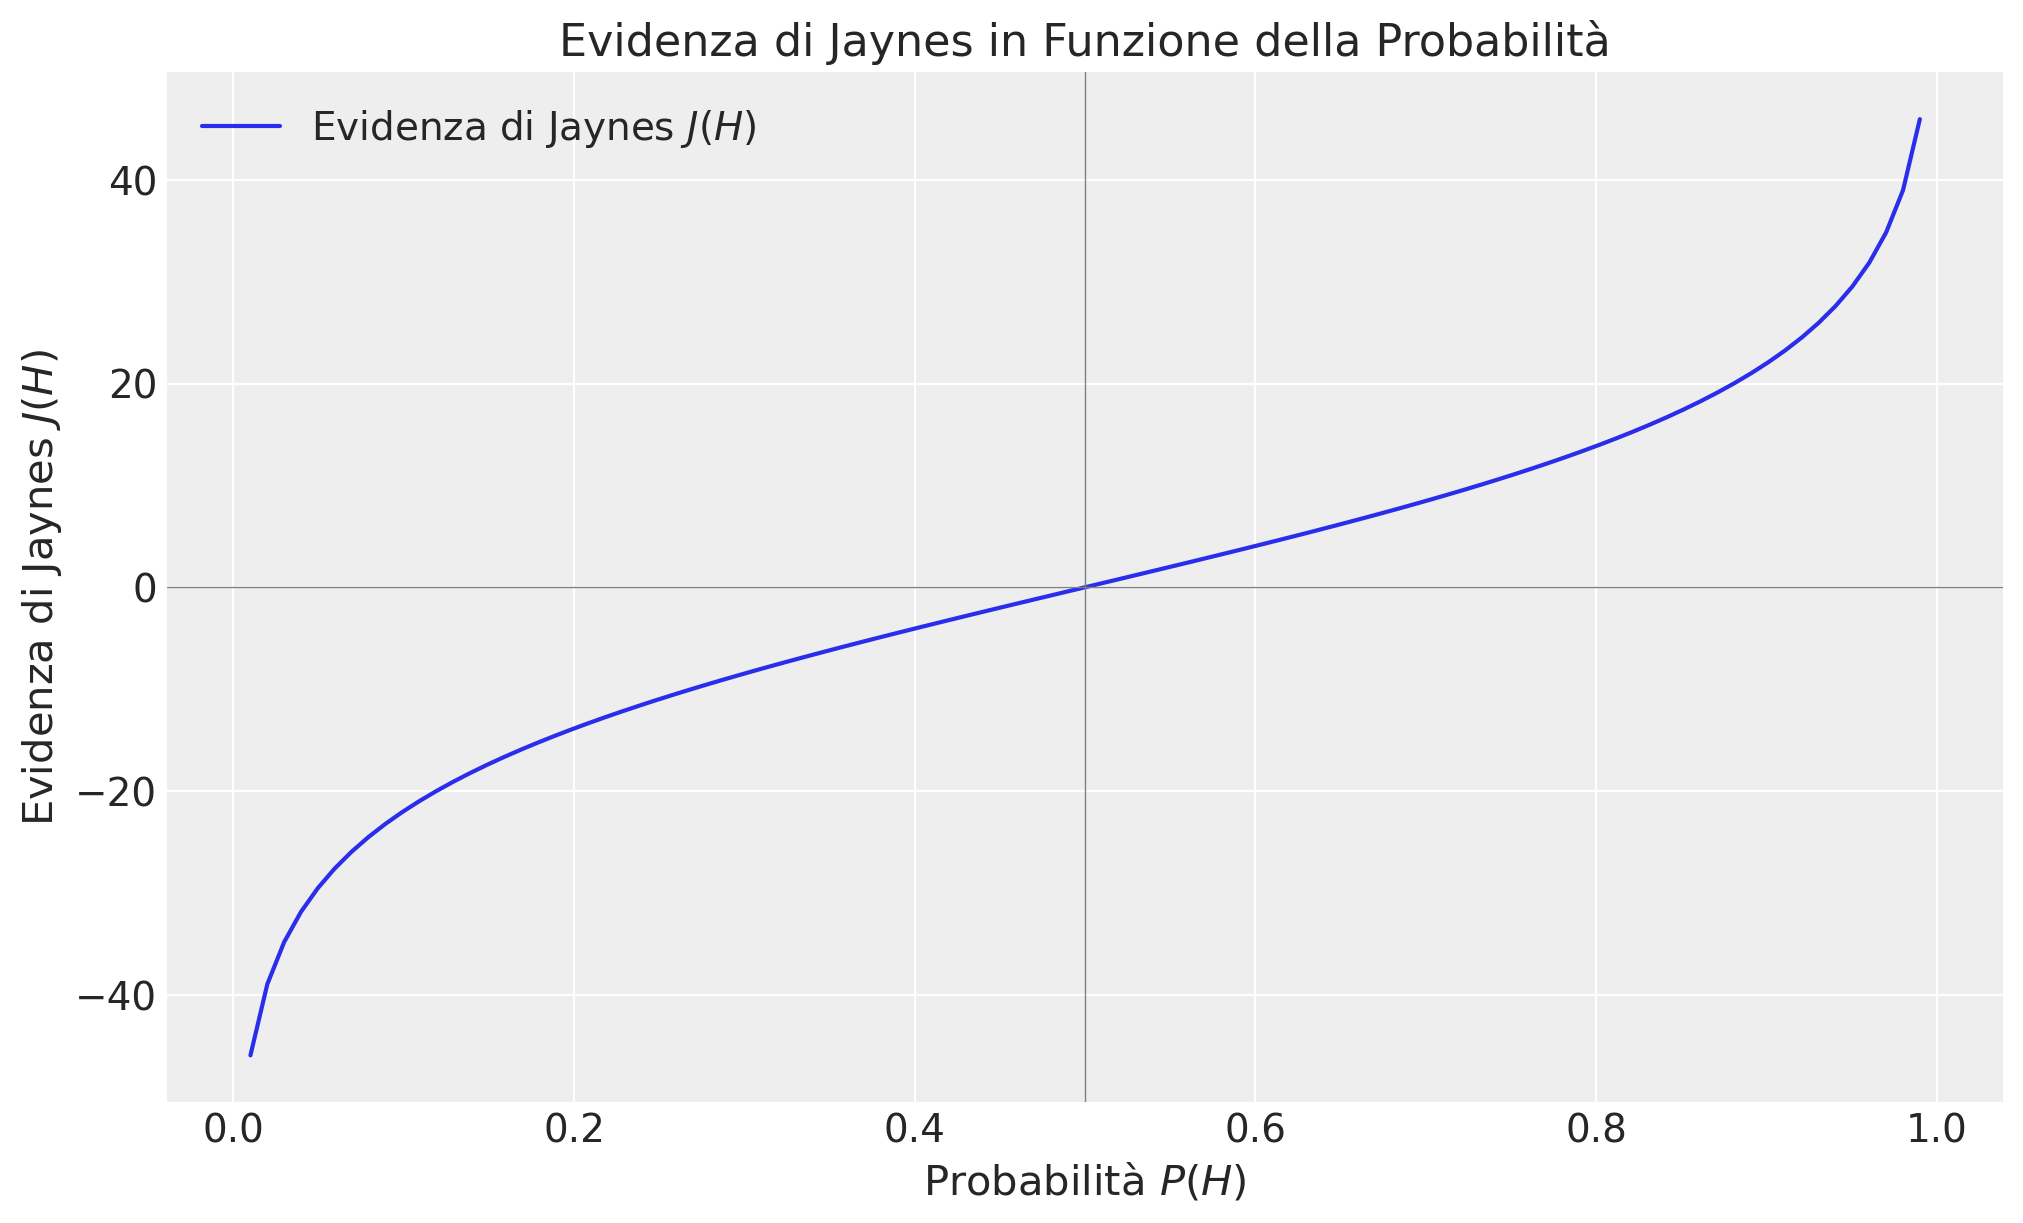

In [32]:
# Valori di probabilità da 0 a 1
probabilities = np.linspace(0.01, 0.99, 100)

# Calcolo delle log-odds
log_odds = np.log(probabilities / (1 - probabilities))

# Calcolo dell'evidenza di Jaynes J(H)
# Assumiamo un fattore di 10 per scalare il logaritmo, come nel formalismo di Jaynes
evidence_jaynes = 10 * log_odds

# Creazione del grafico
plt.figure(figsize=(10, 6))
plt.plot(probabilities, evidence_jaynes, label='Evidenza di Jaynes $J(H)$')
plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0.5, color='gray', lw=0.5)
plt.xlabel('Probabilità $P(H)$')
plt.ylabel('Evidenza di Jaynes $J(H)$')
plt.title('Evidenza di Jaynes in Funzione della Probabilità')
plt.legend()
plt.show()


In [33]:
%load_ext watermark
%watermark -n -u -v -iv -w 

Last updated: Thu Nov 09 2023

Python implementation: CPython
Python version       : 3.11.6
IPython version      : 8.16.1

pandas    : 2.1.1
arviz     : 0.16.1
numpy     : 1.25.2
matplotlib: 3.8.0

Watermark: 2.4.3

